In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
battles=pd.read_csv('battles.csv')
character_deaths=pd.read_csv('character-deaths.csv')
character_prediction=pd.read_csv('character-predictions.csv')

In [22]:
character_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [23]:
character_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [24]:
character_deaths['Book Intro Chapter']=character_deaths['Book Intro Chapter'].fillna(0)

In [25]:
character_deaths['is_alive'] = [1 if np.isnan(x) else 0 for x in character_deaths['Death Year']]
character_deaths=character_deaths.drop(labels=['Death Year','Book of Death','Death Chapter'],axis='columns')
character_deaths

,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,is_alive
0,Addam Marbrand,Lannister,56.0,1,1,1,1,1,1,0,1
1,Aegon Frey (Jinglebell),None,49.0,1,1,0,0,1,0,0,0
2,Aegon Targaryen,House Targaryen,5.0,1,1,0,0,0,0,1,1
3,Adrack Humble,House Greyjoy,20.0,1,1,0,0,0,0,1,0
4,Aemon Costayne,Lannister,0.0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,21.0,1,0,0,0,1,0,0,1
913,Yurkhaz zo Yunzak,None,47.0,1,0,0,0,0,0,1,0
914,Yezzan Zo Qaggaz,None,25.0,1,1,0,0,0,0,1,0
915,Torwynd the Tame,Wildling,73.0,1,0,0,0,1,0,0,0


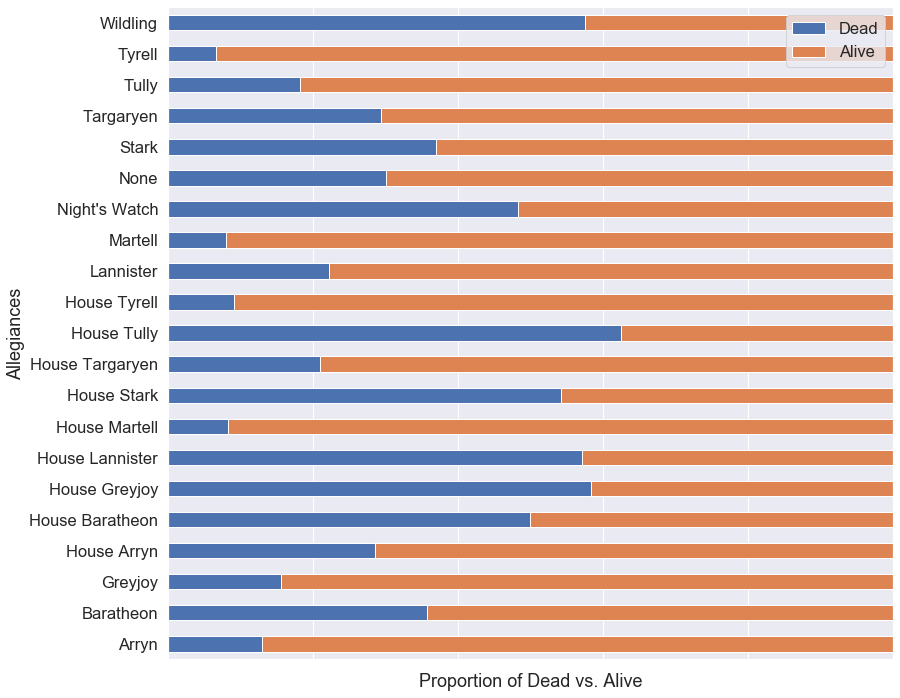

In [26]:
data = character_deaths.groupby(["Allegiances", "is_alive"]).count()["Name"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (13, 12), width = .5)
_ = p.set(xticklabels = "", xlim = [0, 1], ylabel = "Allegiances", xlabel = "Proportion of Dead vs. Alive"), p.legend(["Dead", "Alive"])

In [27]:
character_deaths= pd.get_dummies(data=character_deaths,columns=['Allegiances'])
pd.DataFrame(character_deaths)

,Name,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,is_alive,...,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_None,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,Addam Marbrand,56.0,1,1,1,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,Aegon Frey (Jinglebell),49.0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Aegon Targaryen,5.0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Adrack Humble,20.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Aemon Costayne,0.0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,21.0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
913,Yurkhaz zo Yunzak,47.0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
914,Yezzan Zo Qaggaz,25.0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
915,Torwynd the Tame,73.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


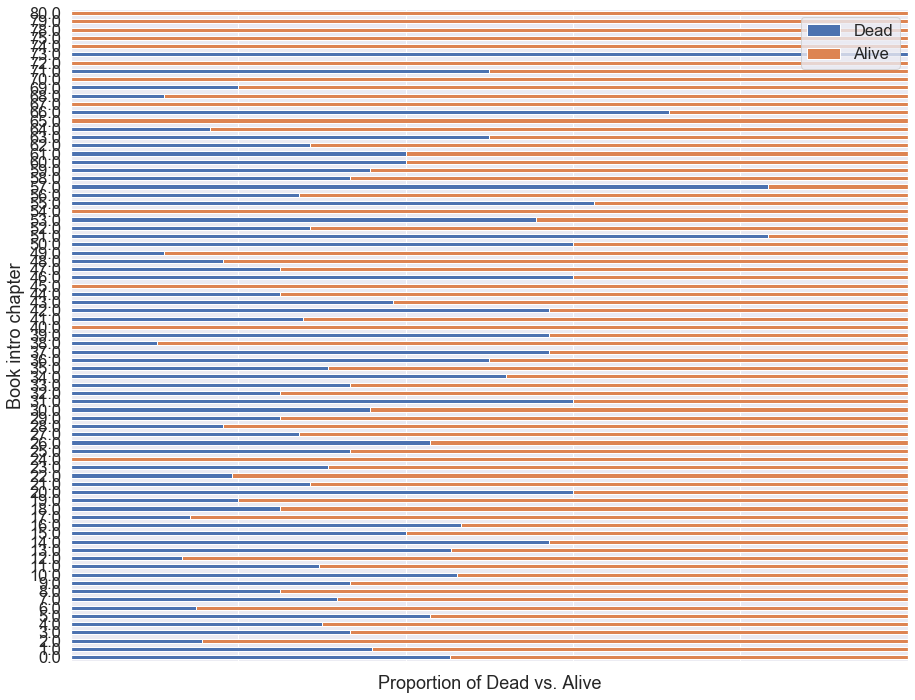

In [28]:
data = character_deaths.groupby(["Book Intro Chapter", "is_alive"]).count()["Name"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 12), width = .5)
_ = p.set(xticklabels = "", xlim = [0, 1], ylabel = "Book intro chapter", xlabel = "Proportion of Dead vs. Alive"), p.legend(["Dead", "Alive"])

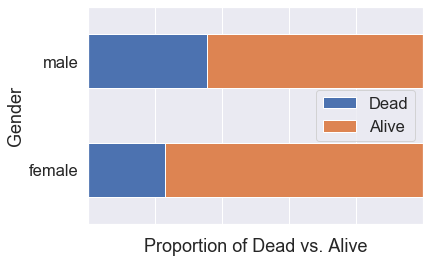

In [34]:
data = character_deaths.groupby(["Gender", "is_alive"]).count()["Name"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0)
_ = p.set(yticklabels = ["female", "male"], xticklabels = "", xlim = [0, 1], ylabel = "Gender", xlabel = "Proportion of Dead vs. Alive"), p.legend(["Dead", "Alive"])

is_alive    0    1
Nobility          
0         187  300
1         118  312


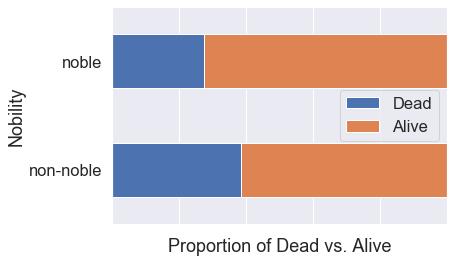

In [35]:
data = character_deaths.groupby(["Nobility", "is_alive"]).count()["Name"].unstack().copy(deep = True)
print(data)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0)
_ = p.set(yticklabels = ["non-noble", "noble"], xticklabels = "", xlim = [0, 1], ylabel = "Nobility", xlabel = "Proportion of Dead vs. Alive"), p.legend(["Dead", "Alive"])

   GoT  CoK  SoS  FfC  DwD
0  142  192  257  219  208
1  108  132  132   31   53


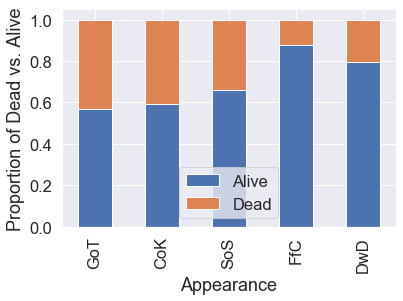

In [32]:
dic = {
    'GoT': [0, 0],
    'CoK': [0, 0],
    'SoS': [0, 0],
    'FfC': [0, 0],
    'DwD': [0, 0],
}
dic['GoT'][0] = len(character_deaths[(character_deaths['GoT'] == 1) & (character_deaths['is_alive'] == 1)])
dic['GoT'][1] = len(character_deaths[(character_deaths['GoT'] == 1) & (character_deaths['is_alive'] == 0)])
dic['CoK'][0] = len(character_deaths[(character_deaths['CoK'] == 1) & (character_deaths['is_alive'] == 1)])
dic['CoK'][1] = len(character_deaths[(character_deaths['CoK'] == 1) & (character_deaths['is_alive'] == 0)])
dic['SoS'][0] = len(character_deaths[(character_deaths['SoS'] == 1) & (character_deaths['is_alive'] == 1)])
dic['SoS'][1] = len(character_deaths[(character_deaths['SoS'] == 1) & (character_deaths['is_alive'] == 0)])
dic['FfC'][0] = len(character_deaths[(character_deaths['FfC'] == 1) & (character_deaths['is_alive'] == 1)])
dic['FfC'][1] = len(character_deaths[(character_deaths['FfC'] == 1) & (character_deaths['is_alive'] == 0)])
dic['DwD'][0] = len(character_deaths[(character_deaths['DwD'] == 1) & (character_deaths['is_alive'] == 1)])
dic['DwD'][1] = len(character_deaths[(character_deaths['DwD'] == 1) & (character_deaths['is_alive'] == 0)])

data = pd.DataFrame(dic)
print(data)
# data = data.unstack().copy(deep = True)
p = data.div(data.sum(axis = 0), axis = 1).T.plot(kind="bar", stacked=True)
_ = p.set(ylabel = "Proportion of Dead vs. Alive", xlabel = "Appearance"), p.legend(["Alive", "Dead"])

In [13]:
y=character_deaths['is_alive']
character_deaths=character_deaths.drop(labels=['is_alive','Name'],axis='columns')
y

0      1
1      0
2      1
3      0
4      1
      ..
912    1
913    0
914    0
915    0
916    0
Name: is_alive, Length: 917, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(character_deaths, y, test_size=0.25, random_state=1)

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


Confusion Matrix:
[[ 41  37]
 [ 31 121]]


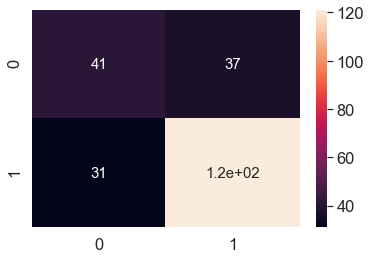

Precision:0.7658227848101266
Recall:0.7960526315789473
Accuracy:0.7043478260869566


In [16]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score
matrix = confusion_matrix(y_test, y_pred,labels=[0, 1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
sns.set(font_scale=1.5) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 15}) # font size
plt.show()

print("Precision:"+str(precision))
print("Recall:"+str(recall))
print("Accuracy:"+str(accuracy))

In [17]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Game of thrones")

'Game of thrones.pdf'

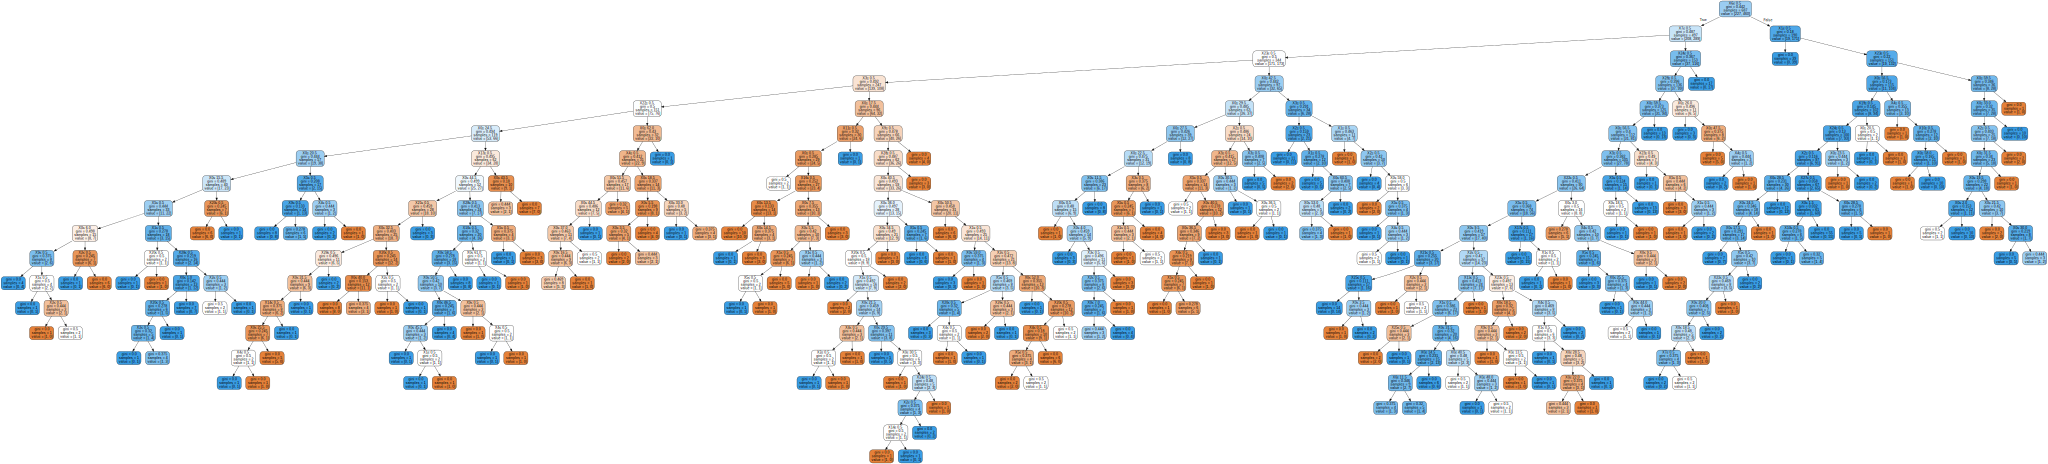

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 